In [2]:
from pryngles import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Vectorial operations

In [7]:
%timeit spy.mxm([[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]])

10.8 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [8]:
%timeit np.matmul([[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]])

4.44 µs ± 19.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [44]:
%timeit spy.mxv([[1,2,3],[4,5,6],[7,8,9]],[1,2,3])

7.55 µs ± 40.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [46]:
%timeit np.matmul([[1,2,3],[4,5,6],[7,8,9]],[1,2,3])

3.56 µs ± 9.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


**Conclussions**: `matmul` is 2 faster than Spice `mxm`, `mxv` operations.

In [93]:
%timeit spy.invert([[1,2,3],[4,5,6],[7,0,9]])

6.85 µs ± 58 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [94]:
%timeit np.linalg.inv([[1,2,3],[4,5,6],[7,0,9]])

8.64 µs ± 676 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**Conclussiones**: SPICE `invert` is almost as fast as `np.linalg.inv`.

In [47]:
%timeit spy.vcrss([1,2,3],[4,5,6])

4.42 µs ± 15.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [48]:
%timeit np.cross([1,2,3],[4,5,6])

21 µs ± 96.2 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


**Conclussions**: SPICE `vcrss` is 5 times faster than `np.cross`

## Pandas

In [ ]:
#sg.data[["x_equ","y_equ","z_equ"]]=2*np.ones((sg.nspangles,3))

In [50]:
X=np.ones((1000,3))
M=np.array([[1,0,0],[0,1,0],[0,0,-1]])

In [51]:
df=pd.DataFrame(X,columns=["x","y","z"])

In [52]:
%timeit X=np.array(df[["x","y","z"]])

186 µs ± 3.05 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [53]:
%timeit X=df[["x","y","z"]].to_numpy()

185 µs ± 3.97 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [54]:
%timeit X=list(df[["x","y","z"]])

184 µs ± 687 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [55]:
%timeit df[["a","b","c"]]=df.apply(lambda df:pd.Series(np.matmul(M,[df.x,df.y,df.z])),axis=1)

55.6 ms ± 544 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [56]:
%timeit df[["a","b","c"]]=[np.matmul(M,x)+[0,1,0] for x in np.array(df[["x","y","z"]])]

5.69 ms ± 44.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Conclussions**: for cycle and numpy operations are 10 times faster than apply method in DataFrame. 

## Sampler

In [20]:
%timeit -n 1 sp=Sampler(preset="ring",N=2550,ri=0.5)

429 ms ± 578 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
sp=Sampler(N=2550)

In [25]:
%timeit -n 1 sp.gen_ring()

1.3 s ± 34.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Transformation

In [8]:
xyz=[1,1,1]
%timeit Science.cospherical(xyz)
%timeit Science.spherical(xyz)
%timeit Science.pcylindrical(xyz)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1.71 µs ± 6.96 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
9.73 µs ± 173 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


AttributeError: type object 'Science' has no attribute 'pcylindrical'

## Update visibility

<IPython.core.display.Javascript object>


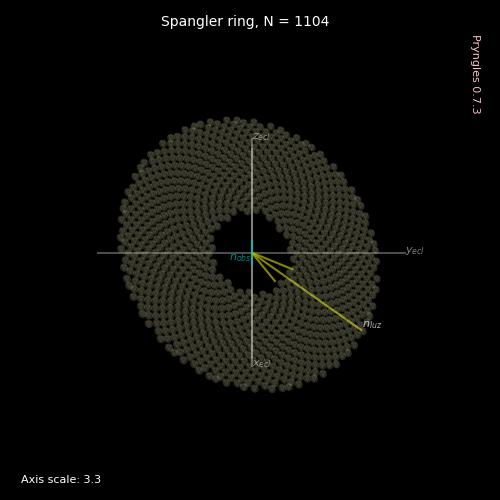

In [65]:
sg=Spangler(nspangles=1000,n_equ=[0.5,0.5,1])
sg.populate_spangler(geometry="ring",ri=0.3,spangle_type=GRANULAR_SPANGLE,preset=True,scale=3)
sg.set_observer([1,0,1])
sg.set_luz([0,1,-1])
sg.update_simple_state()
sg.plot3d()

In [66]:
%timeit sg.update_simple_state()

973 µs ± 9.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<IPython.core.display.Javascript object>


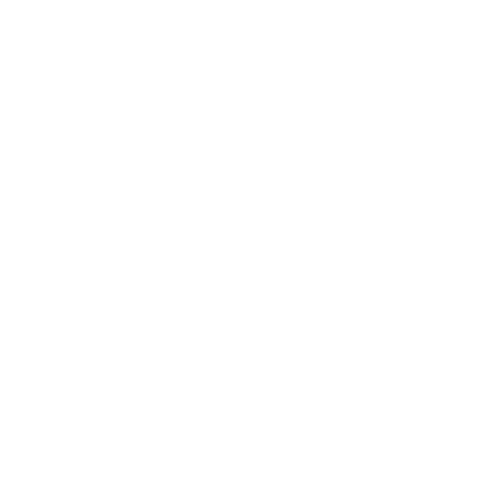

In [24]:
sg=Spangler(nspangles=100)
sg.populate_spangler(geometry="sphere",spangle_type=GASEOUS_SPANGLE,preset=True,scale=3)
sg.set_observer([0,0,1])
sg.set_luz([1,0,0])
sg.update_simple_state()
sg.plot3d()